# Netflix Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_clean.csv')

## 1. movie/ show split

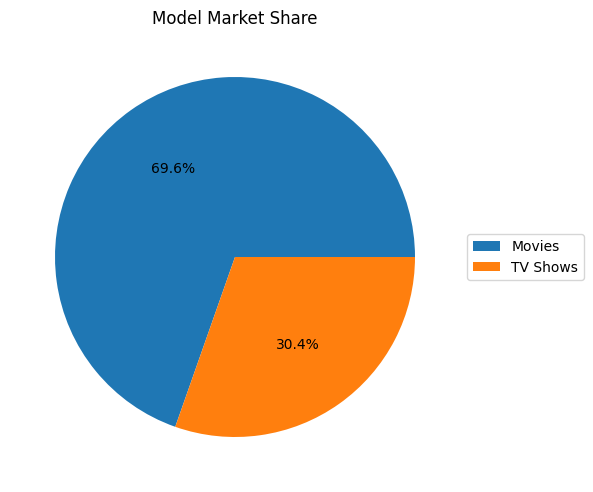

In [3]:
plt.pie(df['type'].value_counts(), autopct='%.1f%%')
plt.legend(labels=['Movies','TV Shows'], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

# plt.legend(title='Model Type', labels=['TM195','TM498','TM798'], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.title('Model Market Share');

## 2. strategy for when to update?

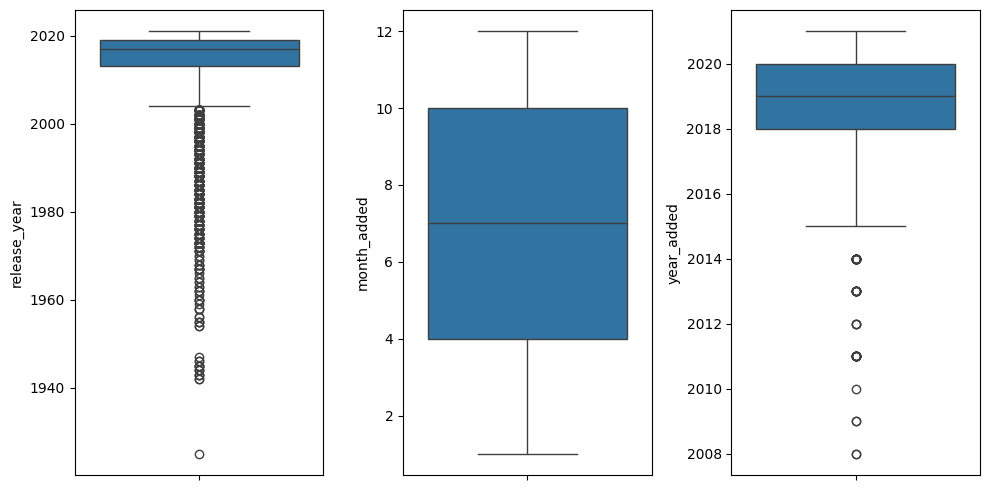

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))

for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    try:
        sns.boxplot(data=df, ax=axes[i], y=col)
    except:
        None

plt.tight_layout()

In [5]:
import calendar

In [6]:
calendar.month_name[1]

'January'

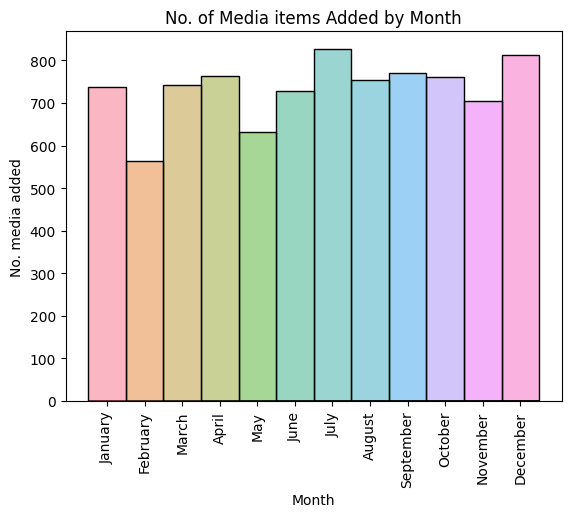

In [7]:
def int_month(i):
    try:
        return calendar.month_name[int(i)]
    except: None


df['month_added_str'] = df.month_added.map(int_month)
df_month_order = df.sort_values('month_added')
sns.histplot(data=df_month_order, x='month_added_str', bins=12, hue='month_added_str', legend=False)
plt.title('No. of Media items Added by Month')
plt.ylabel('No. media added')
plt.xlabel('Month')
# xs = range(1,13)
plt.xticks(rotation=90);

[quarters](https://www.investopedia.com/terms/q/quarter.asp#:~:text=A%20quarter%20is%20a%20three,(or%20Q1'22).)

'January, February, and March (Q1)\
April, May, and June (Q2)\
July, August, and September (Q3)\
October, November, and December (Q4)'

Text(0.5, 0, 'Quarter')

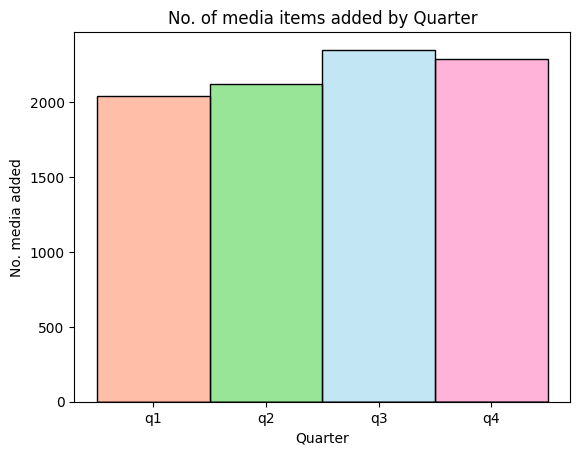

In [8]:
def quarter(i):
    if i in [1,2,3]:
        return 'q1'
    elif i in [4,5,6]:
        return 'q2'
    elif i in [7,8,9]:
        return 'q3'
    else: return 'q4'

df_month_order['quarter'] = df.month_added.map(quarter)
sns.histplot(data=df_month_order, x='quarter', bins=4, hue='quarter', legend=False, palette = ['coral','limegreen','skyblue','hotpink'])
plt.title('No. of media items added by Quarter')
plt.ylabel('No. media added')
plt.xlabel('Quarter')
# xs = range(1,13)
# plt.xticks(rotation=90);

In [9]:
## Look how little work is required for a countplot by comparison - does the grouping for you!!!


df.date_added = pd.to_datetime(df.date_added)
df['day_added'] = df.date_added.dt.strftime('%A')


day_counts = df.groupby('day_added')['day_added'].count()


day_dict = {'Monday':0,'Tuesday' :1, 'Wednesday':2, 'Thursday':3,'Friday':4, 'Saturday':5,'Sunday':6}

# day_counts = pd.DataFrame(day_counts).rename({'day_added':'count'},axis=1)
# day_counts.reset_index(inplace=True)
# day_counts.set_index('day_added', drop = False, inplace=True)
# day_counts.day_added = day_counts.day_added.map(day_dict)
# day_counts.rename({'day_added': 'day'}, axis=1, inplace = True)
# day_counts.sort_values(by='day', inplace=True)


# sns.barplot(data = day_counts, x='day_added', y='count', hue = 'day_added')

# # sns.countplot(data=day_counts,  x='count',order='day_added', hue = 'day_added')

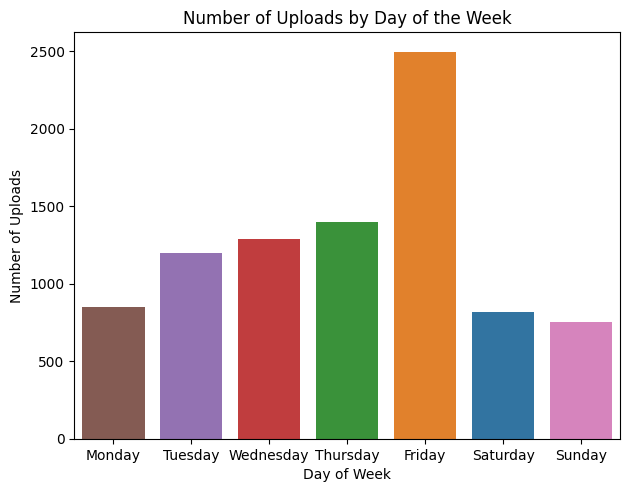

In [10]:
df.date_added = pd.to_datetime(df.date_added)
df['day_added'] = df.date_added.dt.strftime('%A')

sns.countplot(x=df['day_added'], order = day_dict, hue=df['day_added'], legend=False)
plt.tight_layout()
plt.title('Number of Uploads by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Uploads');
# df

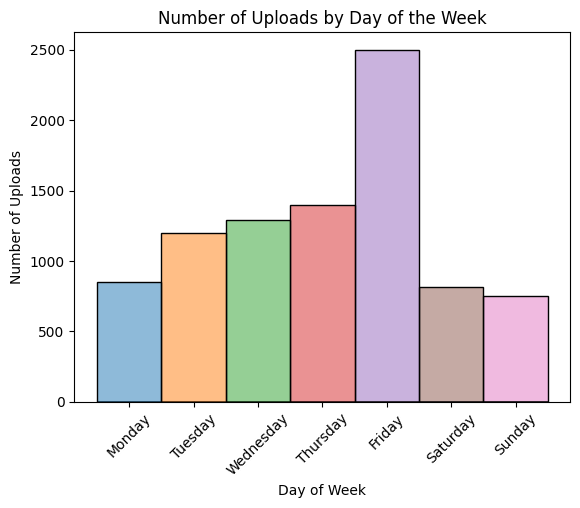

In [11]:
i_day_order = df.day_added.map(day_dict).sort_values().index
df_dayhist = df.loc[i_day_order]

sns.histplot(x=df_dayhist['day_added'],  hue=df_dayhist['day_added'], legend=False)
plt.title('Number of Uploads by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Uploads');
plt.xticks(rotation=45);

## 3a. Genres

most popular genres in the uk\
docs, dramas comedies, thriller/mystery/crime, news, sports, scifi fantasy, game shows, horror, reality

In [12]:
# df.head(0)

In [13]:
df['genres'] = df.listed_in.str.split(', ')
genre_list = df.genres.sum()
genre_counts = []
for genre in genre_list:
    genre_counts.append((genre, genre_list.count(genre)))

In [14]:
mov_tv_genres = df.groupby('type')['genres'].sum()
mov_genres = mov_tv_genres.iloc[0]
mov_genre_counts = []
for mov_genre in mov_genres:
    mov_genre_counts.append((mov_genre, mov_genres.count(mov_genre)))


tv_genres = mov_tv_genres.iloc[1]
tv_genre_counts=[]
for tv_genre in tv_genres:
    tv_genre_counts.append((tv_genre, tv_genres.count(tv_genre)))
# mov_genre_counts

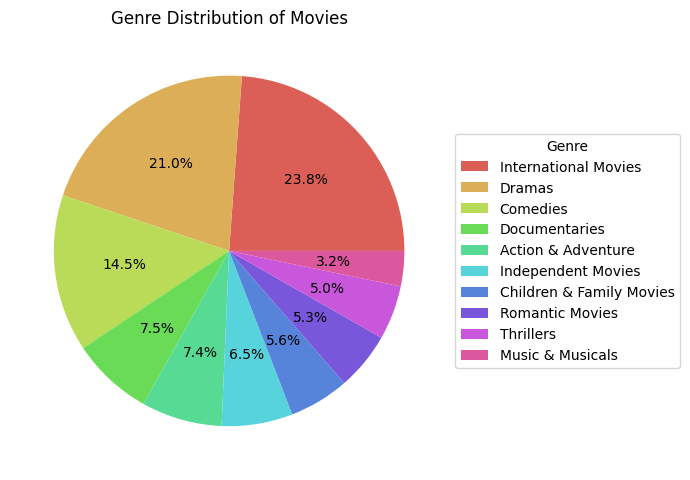

In [15]:
mov_genre_counts = list(set(mov_genre_counts))
mov_genre_counts.sort(key= lambda x:x[1], reverse=True)

# displaycmov_genre_counts
# mov_genre_counts.pop(mov_genre_counts.index(('International Movies',2752)))
label = [ mov_genre[0] for mov_genre in mov_genre_counts]
count = [ mov_genre[1] for mov_genre in mov_genre_counts]
my_palette = sns.color_palette('hls',10)
plt.figure(figsize=(7,6))
plt.pie(x=count[:10], colors=my_palette,autopct='%.1f%%' );


plt.legend(title='Genre', labels=label[:10], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.title('Genre Distribution of Movies');
plt.tight_layout()

# plt.bar(height=count[:10], x=label[:10], color =my_palette )
# plt.xticks(rotation=90)
# plt.title('No. Movies per Genre')
# plt.xlabel('Genres')
# plt.ylabel('No. entries');

In [16]:
tv_palette = my_palette[0], my_palette[1], my_palette[7], my_palette[5], my_palette[2],  my_palette[6], (255/255,0,0), (35/255,98/255,143/255), (35/255,98/255,143/255), (35/255,98/255,143/255)
# my_palette[0]

In [17]:
# tv_palette

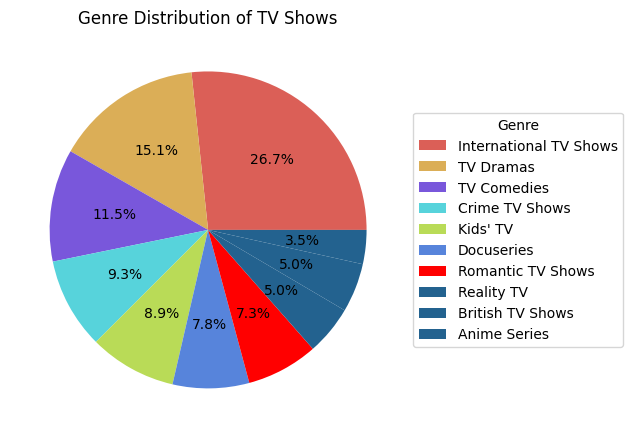

In [18]:
tv_genre_counts = list(set(tv_genre_counts))
tv_genre_counts.sort(key= lambda x:x[1], reverse=True)
# tv_genre_counts.pop(tv_genre_counts.index(('International TV Shows',1351 )))
label = [ tv_genre[0] for tv_genre in tv_genre_counts]
count = [ tv_genre[1] for tv_genre in tv_genre_counts]

plt.pie(x=count[:10], colors=tv_palette,autopct='%.1f%%' );

plt.legend(title='Genre', labels=label[:10], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.title('Genre Distribution of TV Shows');
plt.tight_layout()


# plt.figure(figsize=(7,6))
# plt.bar(height=count[:10], x=label[:10], color = tv_palette)
# plt.xticks(rotation=90)
# plt.tight_layout();
# plt.title('No. TV Shows per Genre')
# plt.xlabel('Genres')
# plt.ylabel('No. entries');

## 3b. Genre Time Series

In [19]:
pd.options.mode.copy_on_write = True

In [20]:
# #ts - time series
# #gc - genre counts

# set(genre_list)

# index=[]
# value=[]
# for i, j in set(genre_counts):
#     index.append(i)
#     value.append(j)
    
# df_gc = pd.DataFrame({'genre':index,'count':value})
# df_gc.sort_values(by='count', ascending=False, inplace=True)
# df_gc.reset_index(inplace=True,drop=True)
# # display(df_gc.loc[0:5,'genre'])


# #.sort_values(key = lambda x: x[1])
# # sns.histplot(genre_list)
# # plt.xticks(rotation=90);
# # plt.tight_layout()



# genre_list = list(set(genre_list))
# fig, axe = plt.subplots(6, 7, figsize=(20,20), constrained_layout=True)
# for n,i in enumerate(set(genre_list)):
#     df_ts[i] = [ i  in genres for genres in df_ts['genres']]
#     df_ts_i = df_ts.groupby('year_added')[i].sum()


#     col_i = n%7 
#     row_i = n//7 

#     # print(i, row_i, col_i)
#     sns.lineplot(df_ts_i, ax = axe[row_i][col_i],);
#     axe[row_i][col_i].set_title(i);
#     axe[row_i][col_i].set_xlabel('Year');
#     axe[row_i][col_i].set_ylabel('No.');

# plt.tight_layout();
# # sns.lineplot(data=df_ts,y='int_mov',x='release_year')

In [21]:
df_ts = df[['genres', 'year_added']]

df_mov = df[df['type'] == 'Movie']
df_tv = df[df['type'] == 'TV Show']

mov_genre = df_mov.genres.sum()
tv_genre = df_tv.genres.sum()

mov_genre_count =[]
for i in mov_genre:
    mov_genre_count.append((i, mov_genre.count(i)))

tv_genre_count=[]
for i in tv_genre:
    tv_genre_count.append((i, tv_genres.count(i)))


genre_lists = [list(set(mov_genre_count)), list(set(tv_genre_count))]


print(len(genre_lists[0]), len(genre_lists[1]))

mov_genres_dfs=[]
tv_genres_dfs=[]
for genre_list in genre_lists:
    
    # fig, axe = plt.subplots(5, 5, figsize=(20,20), constrained_layout=True)
    
    for n,i in enumerate(set(genre_list)):
        # print(i)
        i=i[0]
        df_ts[i] = [ i  in genres for genres in df_ts['genres']]
        df_ts_i = df_ts.groupby('year_added')[i].sum()

        if genre_list == genre_lists[0]:
            mov_genres_dfs.append(df_ts_i)
        else: tv_genres_dfs.append(df_ts_i)
    
    
        # col_i = n%5
        # row_i = n//5
    
        # # print(i, row_i, col_i)
        # sns.lineplot(df_ts_i, ax = axe[row_i][col_i],);
        # axe[row_i][col_i].set_title(i);
        # axe[row_i][col_i].set_xlabel('Year');
        # axe[row_i][col_i].set_ylabel('No.');


20 22


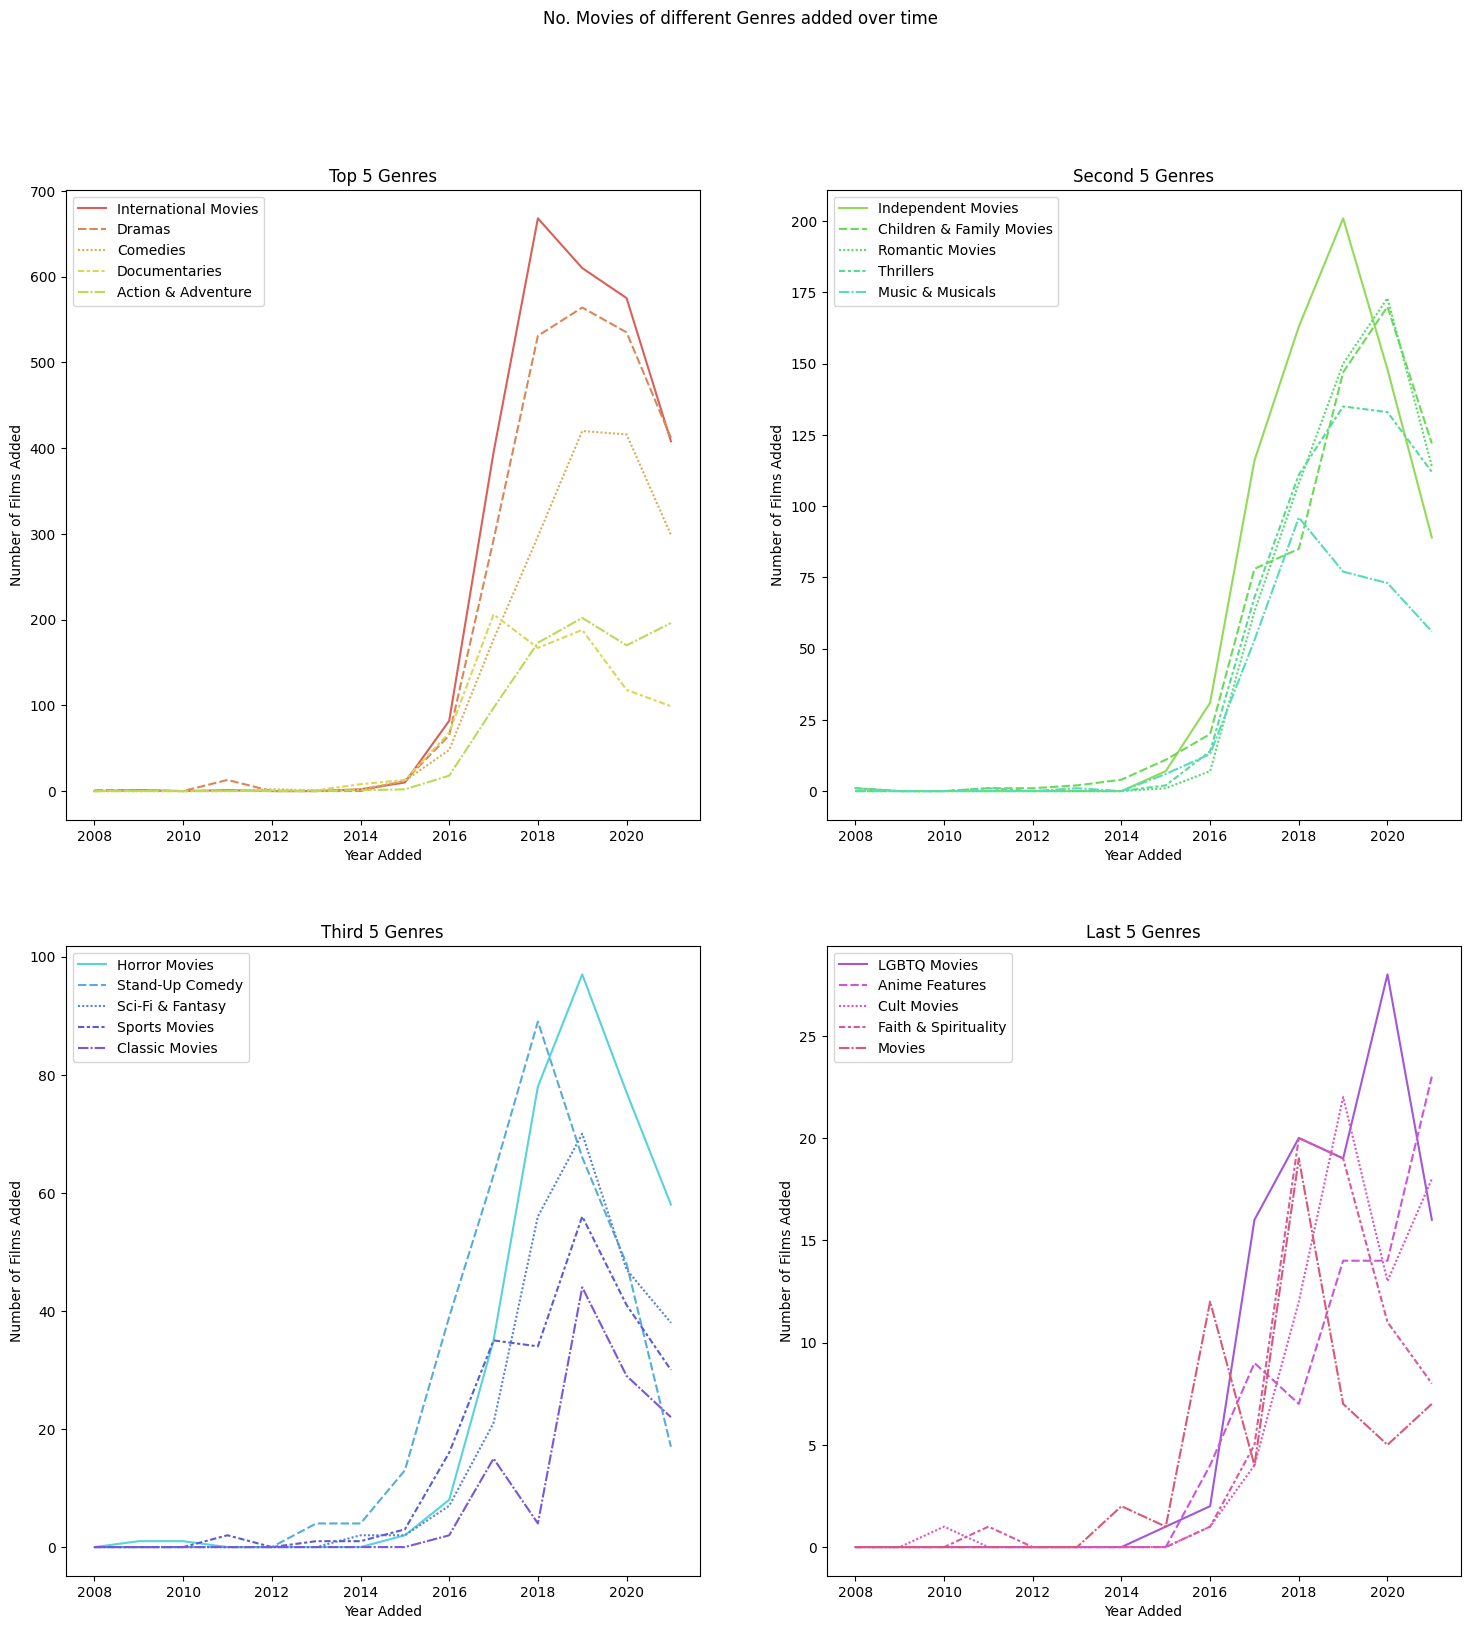

In [22]:
mov_genres_counts = pd.DataFrame(mov_genres_dfs)
mov_genres_counts['tot'] = mov_genres_counts.sum(axis=1)
mov_genres_counts = mov_genres_counts.sort_values('tot', ascending=False)

mov_genres_counts.drop('tot',axis = 1, inplace = True)

top5 = mov_genres_counts[:5]
second5 = mov_genres_counts[5:10]
third5 =  mov_genres_counts[10:15]
last5 = mov_genres_counts[15:]

my_palette = sns.color_palette('hls',20)
labels = mov_genres_counts.index
color_dict = {label: my_palette[n] for n,label in enumerate(labels)}
fig, axe = plt.subplots(2,2, figsize=(18,18))
sns.lineplot(ax = axe[0][0], data = top5.transpose(), palette = color_dict)
axe[0][0].set_title('Top 5 Genres')
sns.lineplot(ax = axe[0][1], data = second5.transpose(),palette = color_dict)
axe[0][1].set_title('Second 5 Genres')
sns.lineplot(ax = axe[1][0], data = third5.transpose(),palette= color_dict)
axe[1][0].set_title('Third 5 Genres')
sns.lineplot(ax = axe[1][1], data = last5.transpose(),palette= color_dict)
axe[1][1].set_title('Last 5 Genres')
plt.suptitle('No. Movies of different Genres added over time')

for i in axe:
    for n,j in enumerate(i):
        j.set_ylabel('Number of Films Added')
        j.set_xlabel('Year Added')

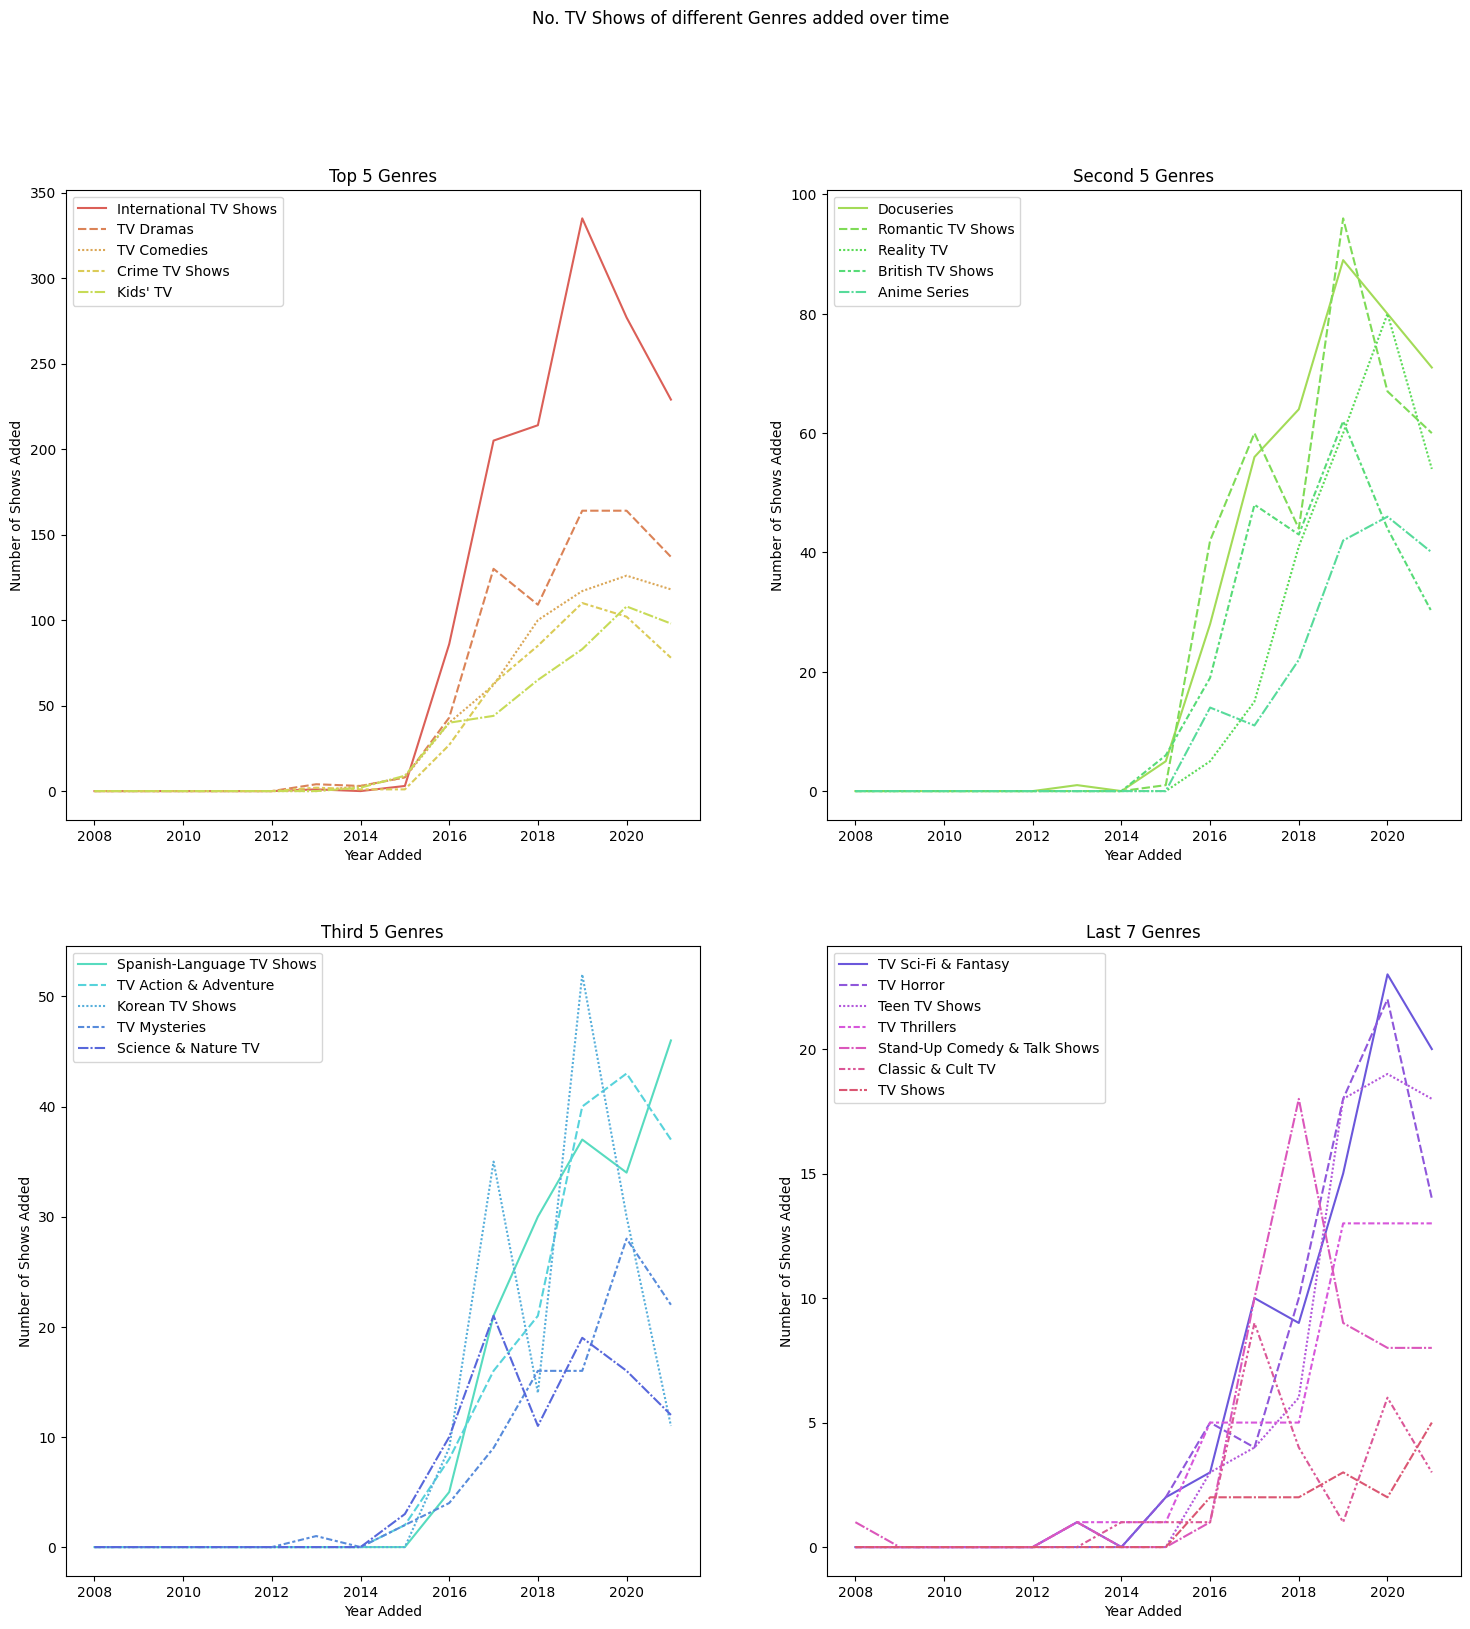

In [23]:
tv_genres_counts = pd.DataFrame(tv_genres_dfs)
tv_genres_counts['tot'] = tv_genres_counts.sum(axis=1)
tv_genres_counts = tv_genres_counts.sort_values('tot',ascending=False)
tv_genres_counts.drop('tot',axis=1,inplace=True)

top5 = tv_genres_counts[:5]
second5 = tv_genres_counts[5:10]
third5 = tv_genres_counts[10:15]
last7 = tv_genres_counts[15:]

my_palette = sns.color_palette('hls',22)
labels = tv_genres_counts.index
color_dict = {label: my_palette[n] for n,label in enumerate(labels)}

fig, axe = plt.subplots(2,2, figsize=(18,18))
sns.lineplot(ax = axe[0][0], data = top5.transpose(), palette = color_dict)
axe[0][0].set_title('Top 5 Genres')
sns.lineplot(ax = axe[0][1], data = second5.transpose(),palette = color_dict)
axe[0][1].set_title('Second 5 Genres')
sns.lineplot(ax = axe[1][0], data = third5.transpose(),palette= color_dict)
axe[1][0].set_title('Third 5 Genres')
sns.lineplot(ax = axe[1][1], data = last7.transpose(),palette= color_dict)
axe[1][1].set_title('Last 7 Genres')
plt.suptitle('No. TV Shows of different Genres added over time')

for i in axe:
    for n,j in enumerate(i):
        j.set_ylabel('Number of Shows Added')
        j.set_xlabel('Year Added')

## 4. Occurence of genre pairings

,Children & Family Movies,Romantic Movies,Faith & Spirituality,Action & Adventure,Stand-Up Comedy,Anime Features,Horror Movies,Music & Musicals,Documentaries,LGBTQ Movies,Comedies,Sports Movies,Movies,Thrillers,Classic Movies,Independent Movies,Cult Movies,Dramas,International Movies,Sci-Fi & Fantasy
Children & Family Movies,641.0,17.0,9.0,26.0,0.0,14.0,0.0,38.0,17.0,1.0,270.0,19.0,0.0,0.0,9.0,6.0,2.0,89.0,25.0,25.0
Romantic Movies,17.0,616.0,4.0,16.0,0.0,3.0,3.0,14.0,0.0,5.0,277.0,4.0,0.0,4.0,4.0,32.0,0.0,308.0,372.0,8.0
Faith & Spirituality,9.0,4.0,65.0,3.0,0.0,0.0,0.0,2.0,12.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,44.0,18.0,1.0
Action & Adventure,26.0,16.0,3.0,859.0,0.0,50.0,27.0,12.0,7.0,0.0,183.0,10.0,0.0,9.0,31.0,36.0,20.0,230.0,398.0,125.0
Stand-Up Comedy,0.0,0.0,0.0,0.0,343.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anime Features,14.0,3.0,0.0,50.0,0.0,71.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,46.0,7.0
Horror Movies,0.0,3.0,0.0,27.0,0.0,1.0,357.0,2.0,2.0,3.0,40.0,0.0,0.0,126.0,3.0,55.0,13.0,3.0,135.0,31.0
Music & Musicals,38.0,14.0,2.0,12.0,7.0,3.0,2.0,375.0,126.0,4.0,91.0,1.0,0.0,3.0,5.0,9.0,3.0,87.0,184.0,2.0
Documentaries,17.0,0.0,12.0,7.0,2.0,1.0,2.0,126.0,869.0,33.0,3.0,114.0,0.0,0.0,12.0,0.0,1.0,3.0,296.0,0.0
LGBTQ Movies,1.0,5.0,0.0,0.0,0.0,0.0,3.0,4.0,33.0,102.0,23.0,2.0,0.0,2.0,1.0,22.0,1.0,43.0,30.0,0.0


,TV Shows,Reality TV,British TV Shows,Crime TV Shows,TV Comedies,TV Thrillers,Classic & Cult TV,TV Horror,TV Dramas,Docuseries,...,Spanish-Language TV Shows,Anime Series,TV Action & Adventure,International TV Shows,Stand-Up Comedy & Talk Shows,Romantic TV Shows,Kids' TV,Science & Nature TV,Teen TV Shows,TV Sci-Fi & Fantasy
TV Shows,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Reality TV,0.0,255.0,39.0,1.0,7.0,1.0,0.0,3.0,1.0,28.0,...,11.0,0.0,3.0,99.0,0.0,22.0,2.0,9.0,4.0,0.0
British TV Shows,0.0,39.0,253.0,50.0,39.0,2.0,6.0,1.0,24.0,90.0,...,0.0,0.0,5.0,129.0,1.0,11.0,31.0,25.0,0.0,1.0
Crime TV Shows,0.0,1.0,50.0,470.0,27.0,11.0,5.0,3.0,180.0,105.0,...,67.0,16.0,41.0,299.0,0.0,10.0,3.0,2.0,1.0,2.0
TV Comedies,0.0,7.0,39.0,27.0,581.0,1.0,8.0,7.0,106.0,5.0,...,18.0,0.0,24.0,240.0,34.0,110.0,127.0,1.0,16.0,11.0
TV Thrillers,0.0,1.0,2.0,11.0,1.0,57.0,0.0,12.0,27.0,0.0,...,0.0,8.0,2.0,23.0,0.0,0.0,6.0,0.0,0.0,2.0
Classic & Cult TV,0.0,0.0,6.0,5.0,8.0,0.0,28.0,3.0,4.0,0.0,...,1.0,0.0,7.0,7.0,0.0,0.0,4.0,0.0,0.0,4.0
TV Horror,0.0,3.0,1.0,3.0,7.0,12.0,3.0,75.0,29.0,0.0,...,1.0,6.0,10.0,34.0,0.0,0.0,0.0,0.0,3.0,6.0
TV Dramas,0.0,1.0,24.0,180.0,106.0,27.0,4.0,29.0,763.0,3.0,...,31.0,0.0,57.0,514.0,0.0,120.0,13.0,1.0,32.0,33.0
Docuseries,0.0,28.0,90.0,105.0,5.0,0.0,0.0,0.0,3.0,395.0,...,11.0,0.0,2.0,117.0,3.0,0.0,1.0,88.0,1.0,1.0


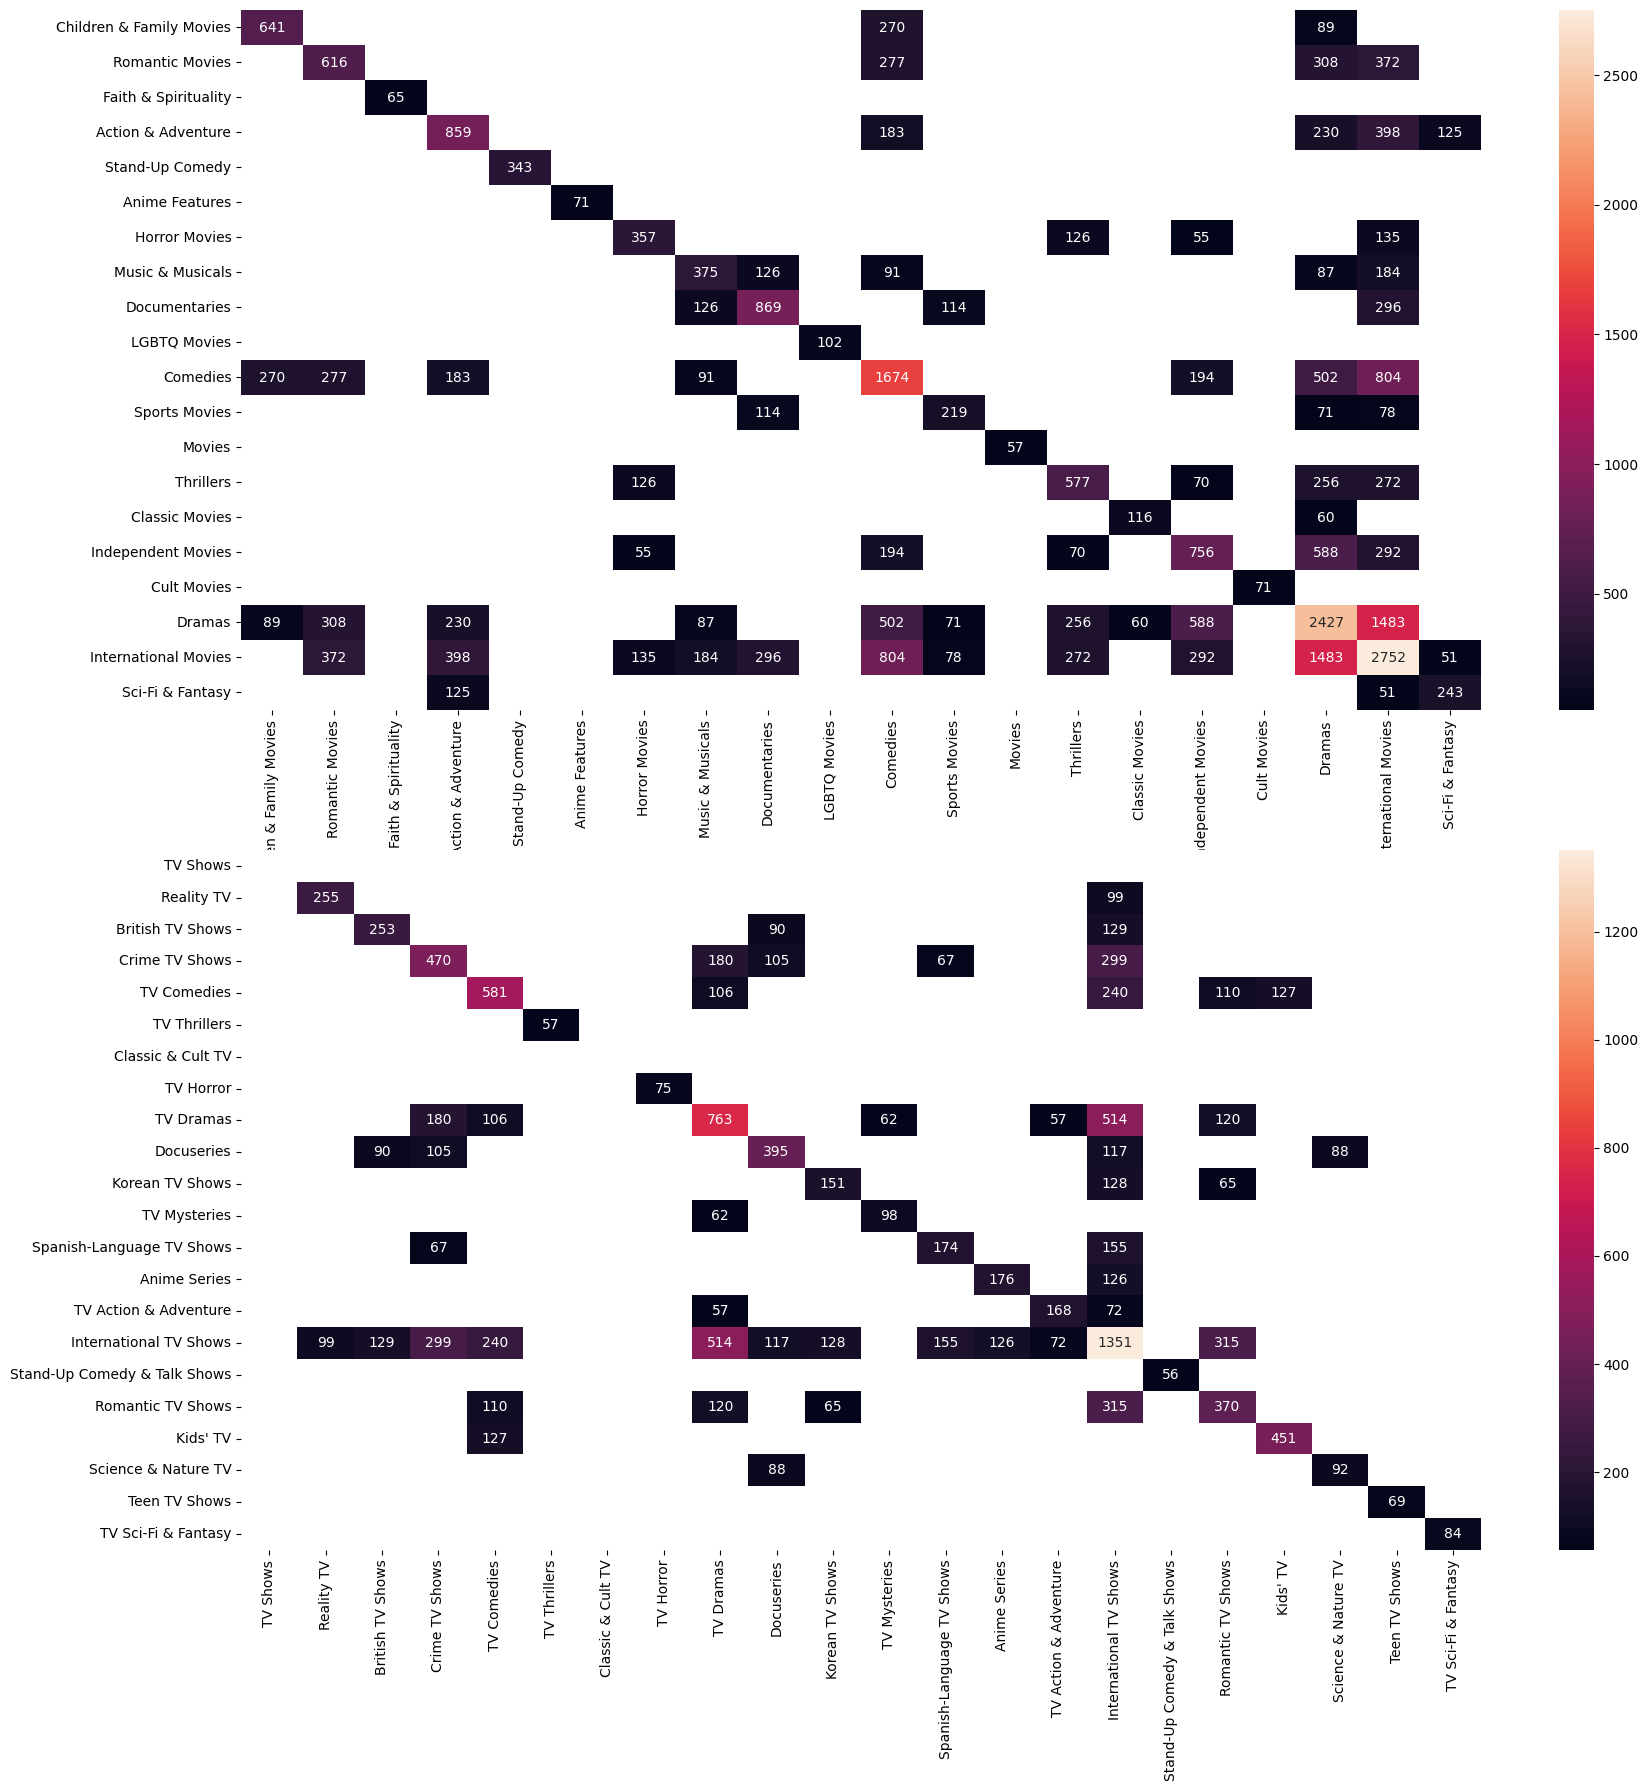

In [24]:
df_ts['type'] = df['type']
df_ts_mov = df_ts[df_ts['type'] == 'Movie']
df_ts_tv = df_ts[df_ts['type'] == 'TV Show']

df_genresss = [df_ts_mov, df_ts_tv]

mov_genres = set(mov_genre)
tv_genres = set(tv_genre)


df_ts_mov.drop(tv_genre, axis=1, inplace=True)
df_ts_tv.drop(mov_genre, axis=1, inplace=True)

fig,axe = plt.subplots(2,1, figsize = (20,20))
for n,i in enumerate(df_genresss):
    df_genrespairs = i.copy()
    df_genrespairs.drop(['genres','year_added','type'], axis=1, inplace= True)

    overlaps=[]
    overlaps =pd.DataFrame()
    for col in df_genrespairs.columns:
        for col2 in df_genrespairs.columns:
            overlap  = len(df_genrespairs[(df_genrespairs[col] == df_genrespairs[col2]) & (df_genrespairs[col] ==1)])
            overlaps.loc[col,col2] = overlap

    display(overlaps)
    mask = overlaps <=50
    sns.heatmap(overlaps, ax =axe[n], annot=True, fmt='g', mask =mask )

In [25]:
def dice_coefficient(vec1, vec2):
    intersection = np.sum(vec1 & vec2)
    total = np.sum(vec1) + np.sum(vec2)
    return 2 * intersection / total

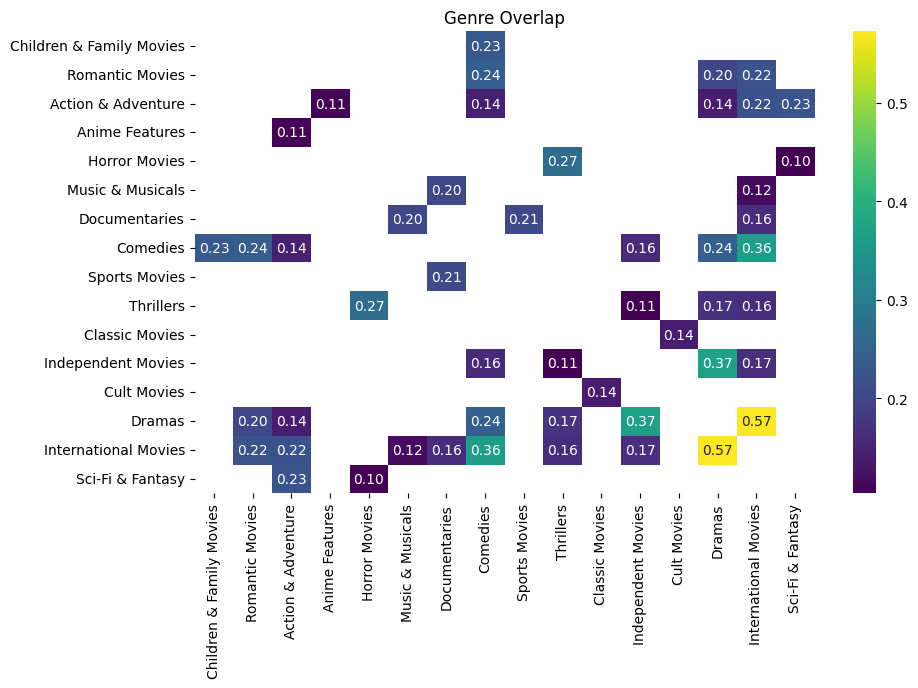

<Figure size 640x480 with 0 Axes>

In [26]:
dices=[]
key=[]
df_ts_mov.drop(['type','genres','year_added'],axis=1, inplace=True)
dices = pd.DataFrame(np.zeros((len(df_ts_mov.columns),len(df_ts_mov.columns))))
dices.index = df_ts_mov.columns
dices.columns = df_ts_mov.columns
for i in range(len(df_ts_mov.columns)):
    for j in range(len(df_ts_mov.columns)):
        dices.iloc[i,j] =dice_coefficient(df_ts_mov.iloc[:,i], df_ts_mov.iloc[:,j])
        dices.index



dices.drop(['LGBTQ Movies','Movies', 'Faith & Spirituality','Stand-Up Comedy'], axis=0, inplace=True)
dices.drop(['LGBTQ Movies','Movies', 'Faith & Spirituality','Stand-Up Comedy'], axis=1, inplace=True)


mask1 = np.triu(dices)
mask2 = dices <= 0.07
mask3 = dices >=0.1
mask4 = dices !=1

dices_masked = dices[mask3&mask4]

mask = ~dices_masked.isnull()

# Plotting the heatmap with annotations
plt.figure(figsize=(10, 6))
sns.heatmap(dices_masked, annot=True, mask=~mask&mask1, cmap='viridis', fmt='.2f')

plt.title('Genre Overlap')
plt.show()
plt.tight_layout()
# display(pd.DataFrame(mask1))
# plt.figure(figsize=(20,20))
# # dices.drop([
# sns.heatmap(dices, mask=mask1|mask2, annot=True)

### Compare with
[genre preferences](https://www.statista.com/forecasts/997833/preferred-tv-content-by-genre-in-the-uk)
### Groupby type to look at tv show genres and then film genres!

## 5a. IMDB top tens/ intersection and Disjoint with netflix data.

In [27]:
imdb_k = pd.read_csv('imdb_10k_votes.csv')
imdb_k['primaryTitle'] = imdb_k['primaryTitle'].str.capitalize()

imdb_k.titleType.value_counts()


imdb_kmovie = imdb_k[(imdb_k['titleType'] == 'movie') | (imdb_k.titleType == 'tvMovie')]
imdb_ktv = imdb_k[(imdb_k.titleType == 'tvSeries') | (imdb_k.titleType =='tvMiniSeries') | (imdb_k.titleType =='tvSpecial')]


imdb = pd.read_csv('netflix_both.csv', index_col = 'show_id')
imdb = imdb.sort_values(by='imdb_votes', ascending=False)
imdb.title = imdb.title.str.capitalize()
imdb_movies = imdb[imdb['type'] == 'Movie']
imdb_tv = imdb[imdb['type'] =='TV Show']


In [28]:
imdb_tv_plotting = imdb_ktv[:10]
imdb_tv_netplotting = imdb_tv[:10]

# display(imdb_tv_netplotting.title, imdb_tv_plotting.primaryTitle)

tv_colours = ['green','red','red','red','red','red','green','green','red','green']
imdb_tv_plotting['colour'] = tv_colours

#netflix red rgb values!
my_palette = ['springgreen',(229/255,9/255,20/255)]


In [29]:
# def shorten(title):
#     if len(title.split(' ')) ==3:
#         return ' '.join(title.split(' ')[0:3]) 
#     elif len(title.split(' ')) >3:
#         return ' '.join(title.split(' ')[0:3]) +'...'
#     else: return title

# imdb_plimdb_plotting.primaryTitle.map(shorten)

C:\Users\andy4\AppData\Local\Temp\ipykernel_40000\1923745009.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe[0].set_xticklabels(imdb_plotting['primaryTitle'][:10],rotation=90);
C:\Users\andy4\AppData\Local\Temp\ipykernel_40000\1923745009.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe[1].set_xticklabels(imdb_tv_plotting['primaryTitle'][:10],rotation=90);


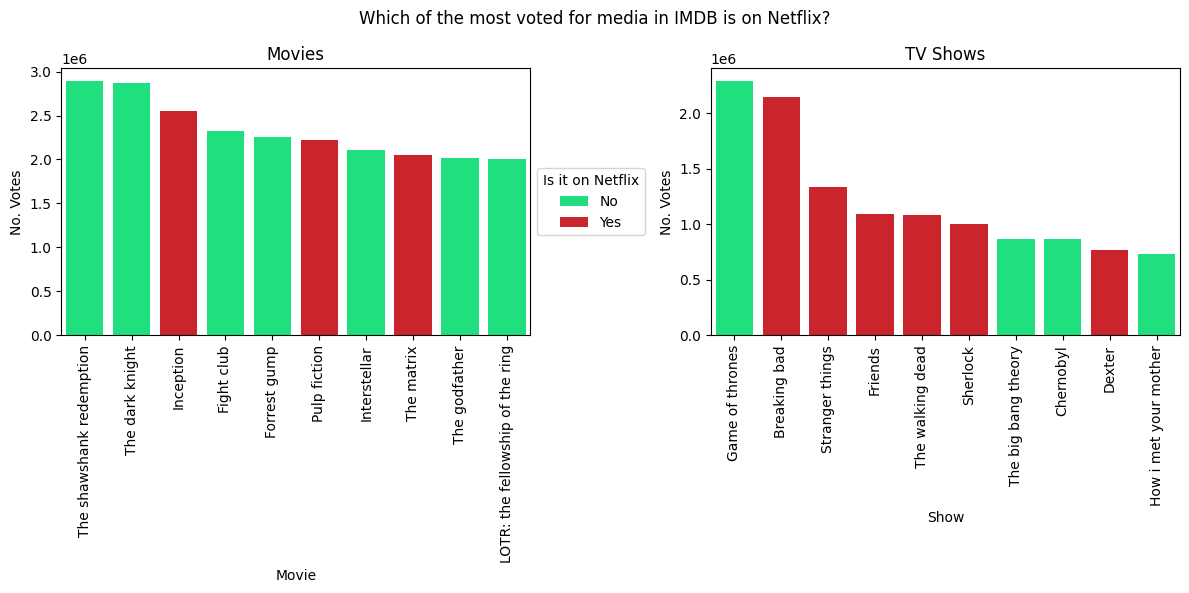

In [30]:
imdb_plotting = imdb_kmovie[:10]
imdb_plotting.loc[11,'primaryTitle'] =  'LOTR: the fellowship of the ring'
imdb_plotting

imdb_netplotting = imdb_movies[:10]

# display(imdb_netplotting.title, imdb_plotting.primaryTitle)

mov_colours = ['green','green','red','green','green','red','green','red','green','green']

imdb_plotting['colour'] = mov_colours

my_palette = ['springgreen',(229/255,9/255,20/255)]


fig, axe = plt.subplots(1,2, figsize=(12,6))
imdb_tv_plotting

sns.barplot(ax = axe[0], data = imdb_plotting, x='primaryTitle',y='numVotes',hue='colour', palette=my_palette, legend= True)

h, l = axe[0].get_legend_handles_labels()
axe[0].legend(h,['No','Yes'], title='Is it on Netflix', loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
axe[0].set_xticklabels(imdb_plotting['primaryTitle'][:10],rotation=90);
axe[0].set_title('Movies')
axe[0].set_xlabel('Movie')
axe[0].set_ylabel('No. Votes')

sns.barplot(ax = axe[1], data=imdb_tv_plotting,x='primaryTitle',y='numVotes',hue='colour',palette=my_palette, legend=False)
axe[1].set_xticklabels(imdb_tv_plotting['primaryTitle'][:10],rotation=90);
axe[1].set_title('TV Shows')
axe[1].set_xlabel('Show')
axe[1].set_ylabel('No. Votes')

plt.suptitle('Which of the most voted for media in IMDB is on Netflix?')

plt.tight_layout()

C:\Users\andy4\AppData\Local\Temp\ipykernel_40000\2466181699.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe[0].set_xticklabels(imdb_movies['title'][:10],rotation=90);
C:\Users\andy4\AppData\Local\Temp\ipykernel_40000\2466181699.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe[1].set_xticklabels(imdb_tv['title'][:10],rotation=90);


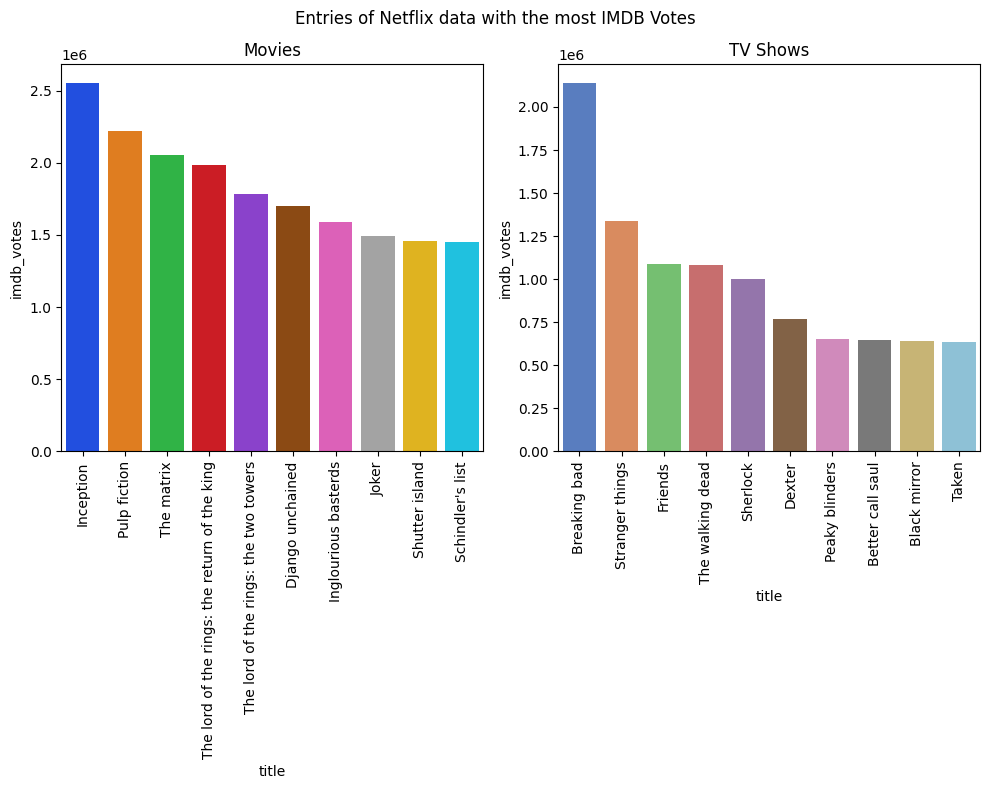

In [31]:
imdb = pd.read_csv('netflix_both.csv', index_col = 'show_id')
imdb = imdb.sort_values(by='imdb_votes', ascending=False)
imdb.title = imdb.title.str.capitalize()
imdb_movies = imdb[imdb['type'] == 'Movie']
imdb_tv = imdb[imdb['type'] =='TV Show']


fig, axe = plt.subplots(1,2, figsize=(10,8))

sns.barplot(ax = axe[0], data= imdb_movies[:10], x = 'title',y='imdb_votes', hue='title', palette = 'bright')
axe[0].set_xticklabels(imdb_movies['title'][:10],rotation=90);
axe[0].set_title('Movies')
sns.barplot(ax = axe[1], data= imdb_tv[:10], x = 'title',y='imdb_votes', hue='title', palette = 'muted')
axe[1].set_xticklabels(imdb_tv['title'][:10],rotation=90);
axe[1].set_title('TV Shows')
plt.suptitle('Entries of Netflix data with the most IMDB Votes')
plt.tight_layout()

## 5b. Write as a whole dataset; favoured imdb media not in netflix data

In [32]:
len(imdb)

7298

In [33]:
#tenk_nin - ten thousand imdb entries that aren't in the netflix data
tenk_nin = imdb_k[~imdb_k.primaryTitle.str.lower().isin(imdb.title.str.lower())]
print(len(tenk_nin))
movie_nin = tenk_nin[tenk_nin.titleType == 'movie']
# sns.barplot(data = movie_nin[:10], x = 'primaryTitle',y='numVotes')
# plt.xticks(rotation=90);

92037


#### color palette writing

1.want tv shows / movies to have same colours across the different bars.
2.Want tv shows colours to be distinct from movies.

1. Take list of top ten movies from both, generate a colour palette for both
2. use a different colour palette for tv than movies.


In [34]:
# imdb_kmovies_list = imdb_kmovie[:10].primaryTitle.to_list()
# imdb_movies_list = imdb_movies[:10].title.to_list()
# movies_list = set(imdb_movies_list + imdb_kmovies_list)

# movies_palette = sns.color_palette('bright', len(movies_list))
# movies_color_dict = dict(zip(movies_list, movies_palette))

# imdb_ktv_list = imdb_ktv[:10].primaryTitle.to_list()
# imdb_tv_list = imdb_tv[:10].title.to_list()
# tv_list = list(set(imdb_tv_list + imdb_ktv_list))

# tv_palette = sns.color_palette('muted', len(tv_list))
# tv_color_dict = dict(zip(tv_list, tv_palette))

# # tv_color_dict

In [35]:
# [movie for movie in imdb_movies_list if movie in imdb_kmovies_list]

In [36]:
# [show for show in imdb_tv_list if show in imdb_ktv_list]

In [37]:
# netflix